# PCA and Random Forest

## Introduction
In this project, I will implement Random Forest (RF) model as supervised machine learning alhorithm and Principal Component Analysis as unsupervised machine learning model.

### About the data set
For this analysis, I will use the wine dataset contains the results of a chemical analysis of wines grown in a specific area of Italy. The data contains no missing values and consits of only numeric data, with a three class target variable for classification.Three types of wine are represented in the 178 samples, with the results of 13 chemical analyses recorded for each sample. The Type variable has been transformed into a categoric variable.
#### Target
Three types of wine are repsesented by Customer_Segment in this data set.

#### Features
There are 13 features:
* Alcohol
* Malic (Malic acid)
* Ash
* Alcalinity (Alcalinity of ash)
* Magnesium
* Phenols (Total phenols)
* Flavanoids
* Nonflavanoids (Nonflavanoid phenols)
* Proanthocyanins
* Color (Color intensity)
* Hue
* Dilution (OD280/OD315 of diluted wines)
* Proline

For the data set, see:
https://rdrr.io/cran/rattle.data/man/wine.html#:~:text=The%20wine%20dataset%20contains%20the%20results%20of%20a,variable%20has%20been%20transformed%20into%20a%20categoric%20variable.



### Objectives

First, I will apply Random Forest by including all features. Then, I will select the most important features to compare the scores. Likewise, I will reduce dimention by PCA and use three components. Finally, I will compare and evalute the results.

## Import Moduls

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib.pyplot import matplotlib
plt.rcParams["figure.figsize"] = (10,6)

## Read and Explore Data

In [1]:
df = pd.read_csv("Wine.csv")

<IPython.core.display.Javascript object>

In [2]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
df.shape

(178, 14)

In [4]:
# Let's look at the categories of our target variable.
df.Customer_Segment.unique()

array([1, 2, 3], dtype=int64)

In [5]:
df.Customer_Segment.value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

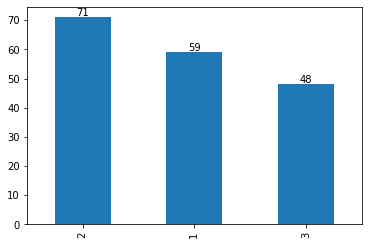

In [7]:
ax = df.Customer_Segment.value_counts().plot.bar()
ax.bar_label(ax.containers[0]);

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

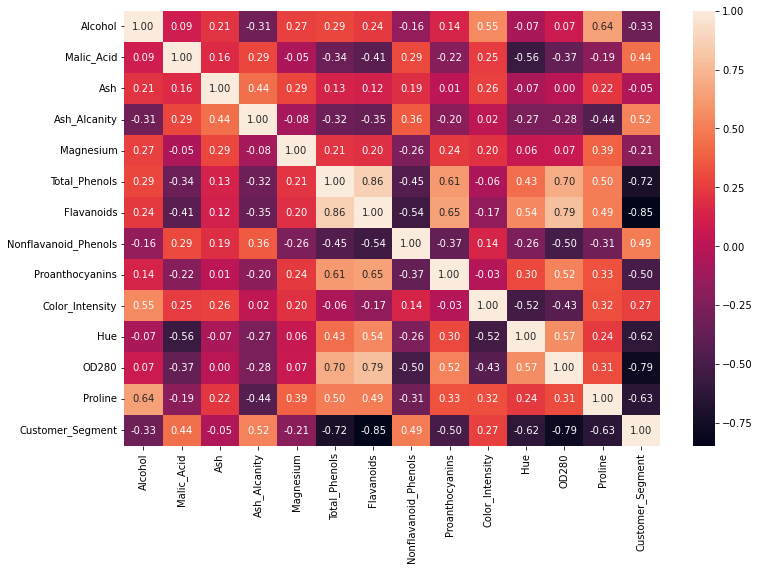

In [8]:
# Let's plot correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True, fmt=".2f");

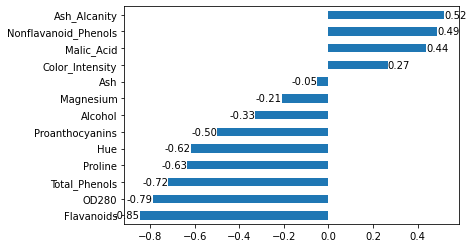

In [9]:
# Let's look closer at the negative and positive correlation of the target variable. 
ax = df.corr()["Customer_Segment"][:-1].sort_values().plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.2f");

Target variable has relatively high negative correlation with Flavanoids (-0.85), OD280 (-0.79), and Total_Phenols(-0.72). On the other hand, it has positive correlation with Ash_Alcanity, Nonflavanoid_Phenols and Malic_Acid around 0.5.

In [10]:
# Let's check if there are any Null values...
df.isnull().sum().any()

False

## Split the Data
##### test_size = 0.2, random_state = 42

In [11]:
X = df.drop("Customer_Segment", axis = 1)

In [12]:
y = df["Customer_Segment"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

## Modeling with Random Forest

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
classifier = RandomForestClassifier(random_state = 42)
classifier.fit(X_train, y_train)
eval_metric(classifier, X_train, y_train, X_test, y_test)

Test_Set
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Train_Set
[[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



In [19]:
# Let's see the sores with cross validation 
from sklearn.model_selection import cross_validate

model = RandomForestClassifier(random_state = 42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_micro','recall_micro','f1_micro'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_accuracy           0.985714
test_precision_micro    0.985714
test_recall_micro       0.985714
test_f1_micro           0.985714
dtype: float64

#### Feature Importance

In [20]:
classifier.feature_importances_

array([0.11791339, 0.03389392, 0.01815663, 0.02547111, 0.04013134,
       0.04151356, 0.15956142, 0.00761029, 0.02353008, 0.18757987,
       0.10153813, 0.09630081, 0.14679945])

In [25]:
feats = pd.DataFrame(index=df.iloc[:,:-1].columns, data= classifier.feature_importances_, 
                     columns=["Importance"])
imp_feats = feats.sort_values("Importance")
imp_feats

<IPython.core.display.Javascript object>

,Importance
Nonflavanoid_Phenols,0.007610
Ash,0.018157
Proanthocyanins,0.023530
Ash_Alcanity,0.025471
Malic_Acid,0.033894
Magnesium,0.040131
Total_Phenols,0.041514
OD280,0.096301
Hue,0.101538
Alcohol,0.117913


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

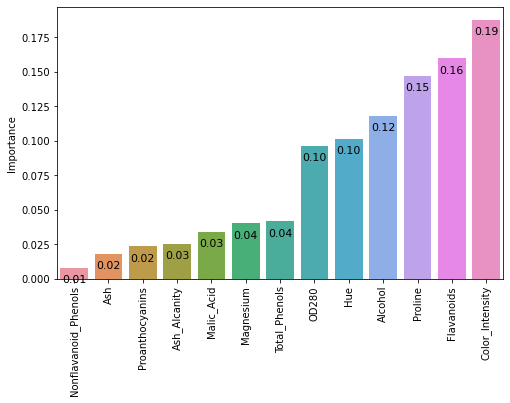

In [31]:
# Random Forest determines the most important features as shown in the graph.
plt.figure(figsize=(8,5))
splot = sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=11,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

## Remodelling by feature importance

I will remodele it by using the most important 3 features to see how much they are effective.

In [36]:
X2 = df[["Color_Intensity", "Flavanoids", "Proline"]]

In [37]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.2, stratify=y, random_state = 42)

In [38]:
classifier2 = RandomForestClassifier(random_state = 42)
classifier2.fit(X_train2, y_train2)
eval_metric(classifier2, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Train_Set
[[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



In [39]:
model = RandomForestClassifier(random_state = 42)

scores = cross_validate(model, X_train2, y_train2, scoring = ['accuracy', 'precision_micro','recall_micro','f1_micro'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_accuracy           0.958571
test_precision_micro    0.958571
test_recall_micro       0.958571
test_f1_micro           0.958571
dtype: float64

## Principal Component Analysis (PCA)
Before implementing PCA, we scale our data.

## Scaling Data

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

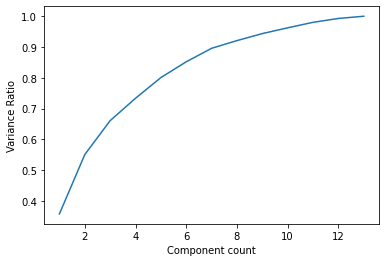

In [43]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_scaled)
x = range(1,14)
plt.plot(x,np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");

In [44]:
pca = PCA(n_components=13).fit(X_train_scaled)

In [45]:
my_dict = {"explained_variance":pca.explained_variance_, 
           "explained_variance_ratio":pca.explained_variance_ratio_,
           "cumsum_explained_variance_ratio":pca.explained_variance_ratio_.cumsum()}

In [50]:
df_ev = pd.DataFrame(my_dict, index = range(1,14))
df_ev

<IPython.core.display.Javascript object>

,explained_variance,explained_variance_ratio,cumsum_explained_variance_ratio
1,4.685973,0.357921,0.357921
2,2.522955,0.192707,0.550628
3,1.442739,0.110198,0.660826
4,0.952101,0.072723,0.733549
5,0.880047,0.067219,0.800768
6,0.671884,0.051319,0.852087
7,0.573101,0.043774,0.895862
8,0.327417,0.025009,0.920870
9,0.298428,0.022794,0.943665
10,0.245754,0.018771,0.962436


In [51]:
pca = PCA(n_components = 3)

In [52]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [53]:
df_pca_train = pd.DataFrame(X_train_pca)
df_pca_train = df_pca_train.rename(columns={0:"first_component", 1:"second_component", 2:"third_component"})
df_pca_train.head()

<IPython.core.display.Javascript object>

,first_component,second_component,third_component
0,-1.472343,-0.734251,-0.454892
1,-2.649709,-1.230211,-1.500462
2,-1.888788,-0.792472,0.099175
3,-2.211159,-0.753458,0.792728
4,2.817571,-1.645688,0.385180


In [37]:
df_pca_test=pd.DataFrame(X_test_pca)
df_pca_test = df_pca_test.rename(columns={0:"first_component", 1:"second_component", 2:"third_component"})
df_pca_test.head()

,first_component,second_component,third_component
0,0.510682,-1.703429,0.476175
1,-1.431099,0.675556,0.335034
2,1.517576,-1.098461,-1.110562
3,-2.504356,1.651059,-0.292180
4,-0.335949,-2.097911,-2.503081


<IPython.core.display.Javascript object>

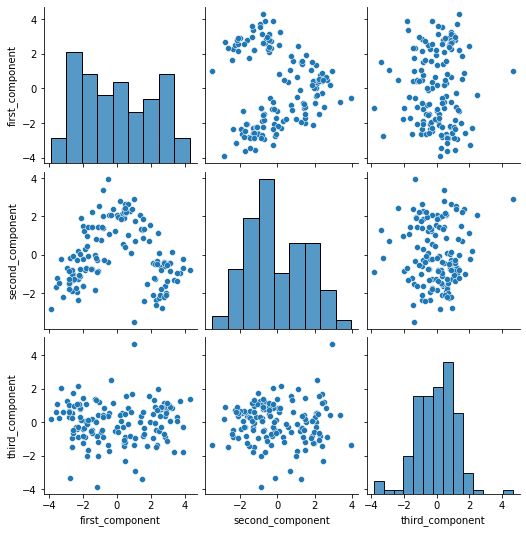

In [54]:
sns.pairplot(df_pca_train)

In [55]:
df_pca_train.corr().round()

,first_component,second_component,third_component
first_component,1.0,0.0,-0.0
second_component,0.0,1.0,0.0
third_component,-0.0,0.0,1.0


## Modelling after PCA

In [56]:
classifier3 = RandomForestClassifier(random_state = 42, max_depth=3)
classifier3.fit(X_train_pca, y_train)
eval_metric(classifier3, X_train_pca, y_train, X_test_pca, y_test)

Test_Set
[[11  1  0]
 [ 1 13  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           2       0.93      0.93      0.93        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36


Train_Set
[[47  0  0]
 [ 2 54  1]
 [ 0  0 38]]
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        47
           2       1.00      0.95      0.97        57
           3       0.97      1.00      0.99        38

    accuracy                           0.98       142
   macro avg       0.98      0.98      0.98       142
weighted avg       0.98      0.98      0.98       142



In [57]:
from sklearn.pipeline import Pipeline

In [59]:
operations = [("scaler", StandardScaler()), ("PCA",PCA(n_components=3)),
              ("RF", RandomForestClassifier(random_state = 42, max_depth=3))]

pipe_model = Pipeline(steps=operations)
                                             
scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision_micro','recall_micro','f1_micro'], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]                                            

<IPython.core.display.Javascript object>

test_accuracy           0.964762
test_precision_micro    0.964762
test_recall_micro       0.964762
test_f1_micro           0.964762
dtype: float64

## Interpreting PCA results

In [60]:
scaled_df = pd.DataFrame(X_train_scaled, columns = df.columns[:-1])

<IPython.core.display.Javascript object>

In [61]:
combined_df = pd.concat([df_pca_train, scaled_df], axis=1)
correlation = combined_df.corr()
correlation.head()

<IPython.core.display.Javascript object>

,first_component,second_component,third_component,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
first_component,1.000000e+00,1.589264e-16,-3.530985e-16,-0.311424,0.504205,-0.015240,0.482301,-0.327540,-0.850732,-0.926477,0.628581,-0.675917,0.207963,-0.640348,-0.826510,-0.625413
second_component,1.589264e-16,1.000000e+00,1.972743e-16,-0.770729,-0.352795,-0.493160,0.061681,-0.469195,-0.120713,0.004011,-0.032968,-0.017259,-0.830054,0.470915,0.269488,-0.565861
third_component,-3.530985e-16,1.972743e-16,1.000000e+00,0.186357,-0.076058,-0.764188,-0.766845,-0.119909,-0.172599,-0.119725,-0.221398,-0.187153,0.159301,-0.143434,-0.138678,0.110923
Alcohol,-3.114242e-01,-7.707289e-01,1.863574e-01,1.000000,0.095420,0.253412,-0.302870,0.278891,0.309496,0.274626,-0.132373,0.090290,0.536240,-0.091521,0.077902,0.620742
Malic_Acid,5.042049e-01,-3.527947e-01,-7.605780e-02,0.095420,1.000000,0.141382,0.233833,-0.029140,-0.306390,-0.376976,0.242760,-0.221257,0.231153,-0.568404,-0.367838,-0.197094


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

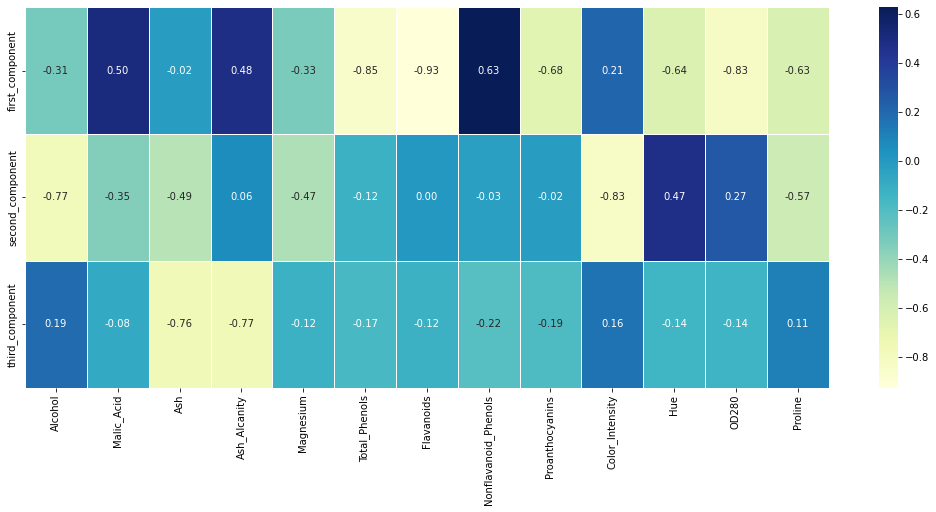

In [62]:
fig, ax = plt.subplots(figsize=(18, 7))
sns.heatmap(correlation.iloc[:3,3:], cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

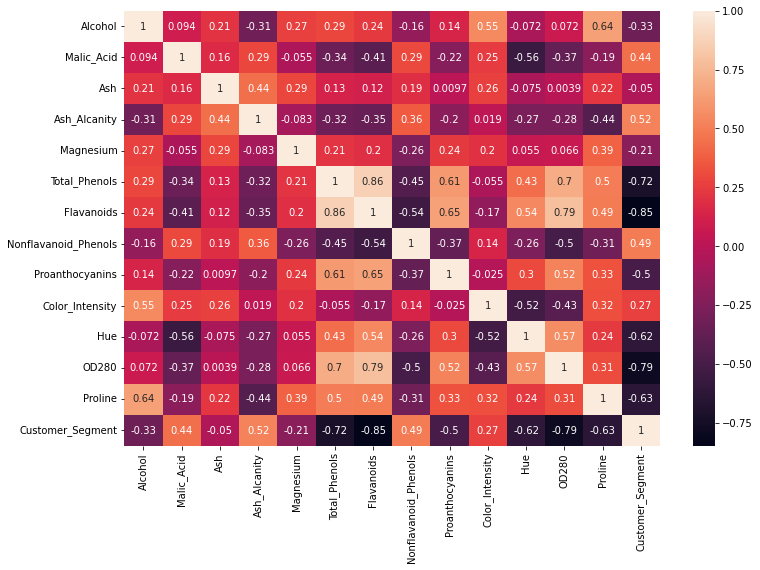

In [64]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True);

### Conclusion

I have implemeted first RF with 13 features, then selected the most important three features. Comparing the scores with cross validation, the RF model with three features has given similar scores (0.958571) with the RF model with 13 features (0.985714), though I have received a little bit lower scores. So, it shows that the effects of these three features on the target variable are quite high. Then, by using three components in PCA, I have reduced dimension. As a result, PCA with three components has provided higher scores(0.964762) comparing to RF with three features.